<a href="https://colab.research.google.com/github/ananya1105/Iris_KNN/blob/master/Iris_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/Iris.csv') 

(150, 6)
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Id :  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 11

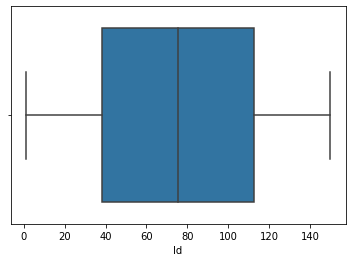

SepalLengthCm :  [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]


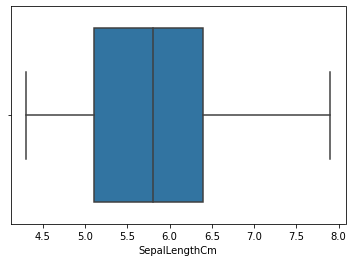

SepalWidthCm :  [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]


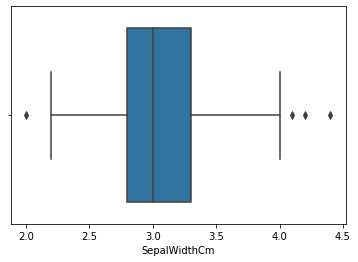

PetalLengthCm :  [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]


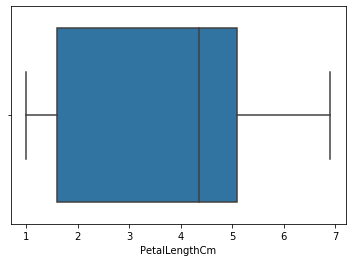

PetalWidthCm :  [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]


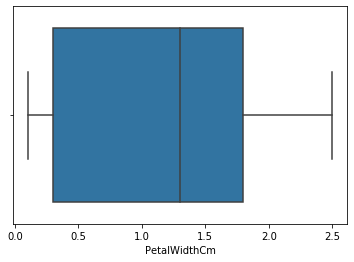

Species :  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [12]:
print(df.shape)
print(df.columns)
print(df.info())
for i in list(df.columns):
    print(i +" : ",df[i].unique())
    if(is_numeric_dtype(df[i])):
        sns.boxplot(df[i])
    plt.show()

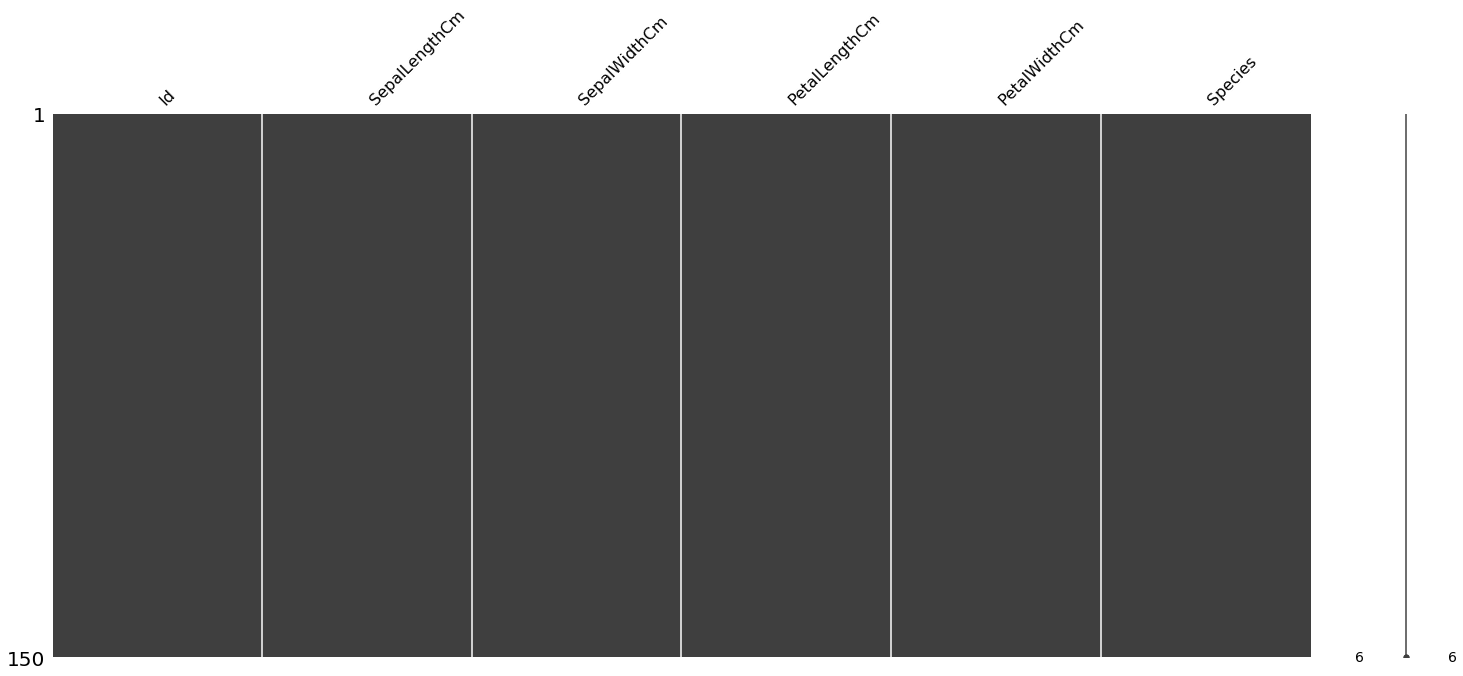

In [13]:
#Is there any missing value in the dataset
msno.matrix(df)


In [14]:
nullity = df.isnull()
print(nullity.sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [15]:
#Checking for duplicate values
df.duplicated().sum()
#There are no duplicate values in the dataset

0

In [16]:
#Looking for correlation between independent variables
print(df.corr())
#There is high correlation between petal width and sepal length
#There is high correlation between petal width and petal length
#There is strong correlation between petal length and sepal length

                     Id  SepalLengthCm  ...  PetalLengthCm  PetalWidthCm
Id             1.000000       0.716676  ...       0.882747      0.899759
SepalLengthCm  0.716676       1.000000  ...       0.871754      0.817954
SepalWidthCm  -0.397729      -0.109369  ...      -0.420516     -0.356544
PetalLengthCm  0.882747       0.871754  ...       1.000000      0.962757
PetalWidthCm   0.899759       0.817954  ...       0.962757      1.000000

[5 rows x 5 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c26fec550>,
      dtype=object)

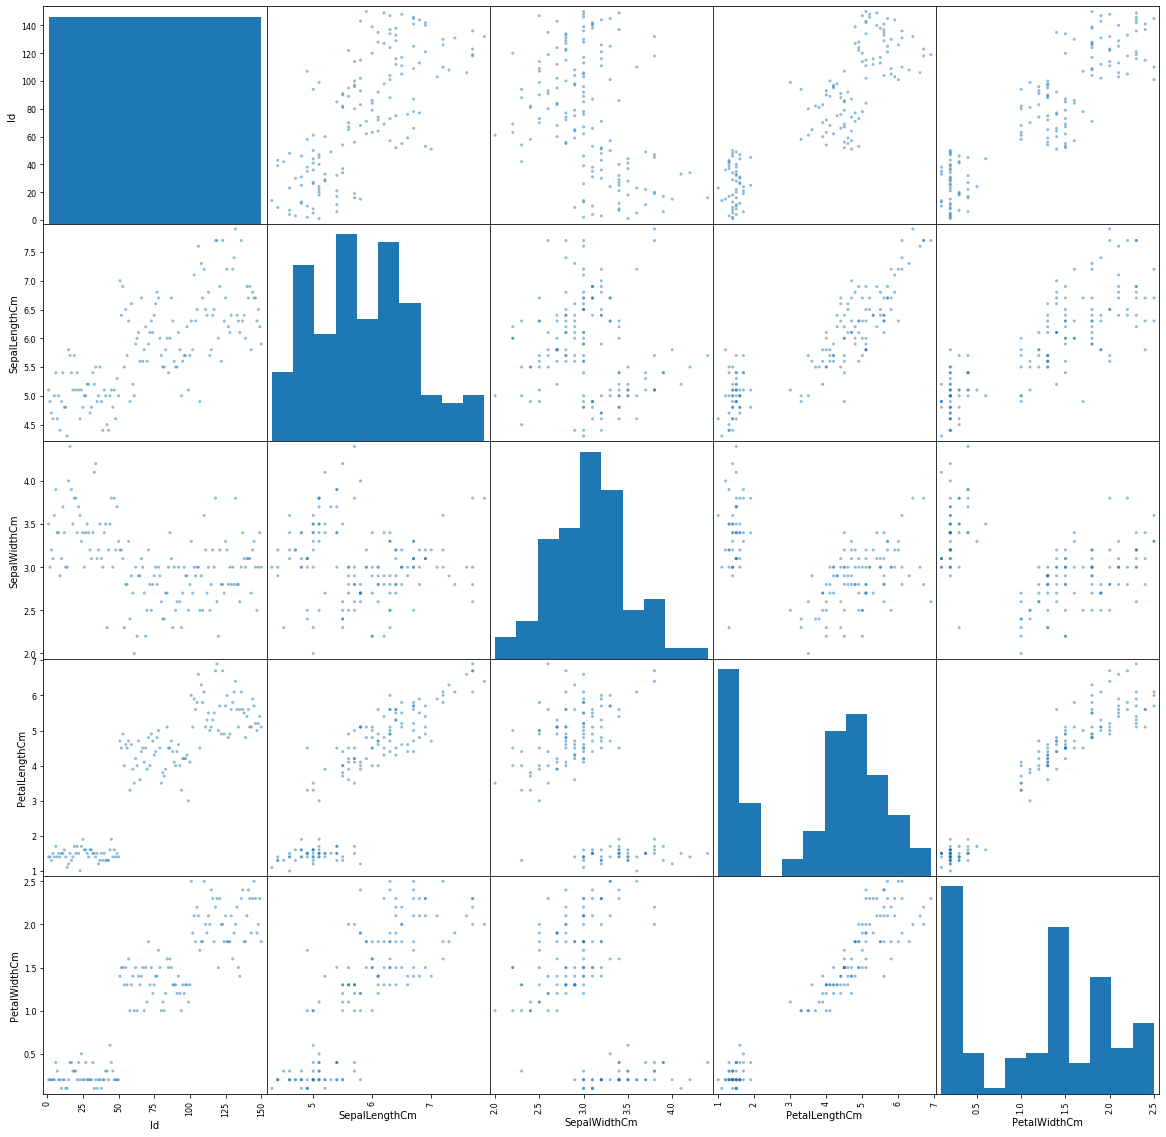

In [17]:
pd.plotting.scatter_matrix(df, figsize = (20,20))

In [18]:
#We will go for principal component analysis in python
iq1 = df.quantile(0.25)
iq3 = df.quantile(0.75)
iqr = iq3-iq1
print(iqr)
#Detecting the outliers
b = (df>iq3+(iqr*1.5)) | (df<iq1-(iqr*1.5))
print(b.sum())
#We have got 4 outliers under SepalWidthCm
print(df[df['SepalWidthCm']>iq3['SepalWidthCm']+(iqr['SepalWidthCm']*1.5)])

print(df[df['SepalWidthCm']<iq1['SepalWidthCm']-(iqr['SepalWidthCm']*1.5)])

Id               74.5
SepalLengthCm     1.3
SepalWidthCm      0.5
PetalLengthCm     3.5
PetalWidthCm      1.5
dtype: float64
Id               0
PetalLengthCm    0
PetalWidthCm     0
SepalLengthCm    0
SepalWidthCm     4
Species          0
dtype: int64
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
15  16            5.7           4.4            1.5           0.4  Iris-setosa
32  33            5.2           4.1            1.5           0.1  Iris-setosa
33  34            5.5           4.2            1.4           0.2  Iris-setosa
    Id  SepalLengthCm  ...  PetalWidthCm          Species
60  61            5.0  ...           1.0  Iris-versicolor

[1 rows x 6 columns]


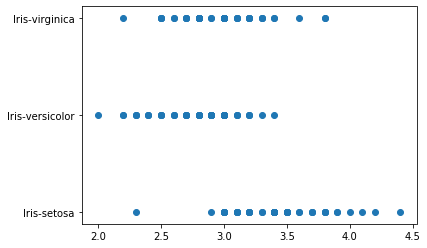

In [19]:
#We will go for principal component analysis in python
plt.scatter(df['SepalWidthCm'],df['Species'])

In [20]:
#Dropping the outlier values
df = df.drop([15,32,33,60], axis = 0)
df.shape

(146, 6)

In [21]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,76.582192,5.856849,3.036986,3.807534,1.219863
std,43.453305,0.834093,0.395145,1.757117,0.760365
min,1.000000,4.300000,2.200000,1.000000,0.100000
25%,40.250000,5.100000,2.800000,1.600000,0.300000
50%,77.500000,5.800000,3.000000,4.400000,1.300000
75%,113.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.000000,6.900000,2.500000


In [22]:
#After removing the outliers we will split the dataset into train and test
from sklearn.neighbors import KNeighborsClassifier
X = df[['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(y_test)
print(pred)

48         Iris-setosa
101     Iris-virginica
28         Iris-setosa
20         Iris-setosa
45         Iris-setosa
124     Iris-virginica
30         Iris-setosa
84     Iris-versicolor
70     Iris-versicolor
19         Iris-setosa
12         Iris-setosa
119     Iris-virginica
145     Iris-virginica
82     Iris-versicolor
141     Iris-virginica
39         Iris-setosa
64     Iris-versicolor
143     Iris-virginica
31         Iris-setosa
58     Iris-versicolor
100     Iris-virginica
126     Iris-virginica
11         Iris-setosa
71     Iris-versicolor
34         Iris-setosa
97     Iris-versicolor
68     Iris-versicolor
105     Iris-virginica
118     Iris-virginica
9          Iris-setosa
4          Iris-setosa
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
17         Iris-setosa
10         Iris-setosa
142     Iris-virginica
88     Iris-versicolor
72     Iris-versicolor
54     Iris-versicolor
139     Iris-virginica
138     Iris-virginica
115     Iris-virginica
0          

In [23]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
print(accuracy_score(y_test,pred))
results = confusion_matrix(y_test, pred)
print(results)

0.9545454545454546
[[17  0  0]
 [ 0 11  0]
 [ 0  2 14]]
